# Reuters dataset

#### Classify articles into one of 46 topics

The x data is a list of indices in the list of all words for each word that appears <br>
The y data is the index of the topic <br>

This is a multiclass classification problem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

from keras import models
from keras import layers
from keras.datasets import reuters
from sklearn.preprocessing import StandardScaler

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
n_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=n_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


In [3]:
# Example review
word_index = reuters.get_word_index()

reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index[idx] for idx in x_train[0]])
print()
print(decoded_review)


the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


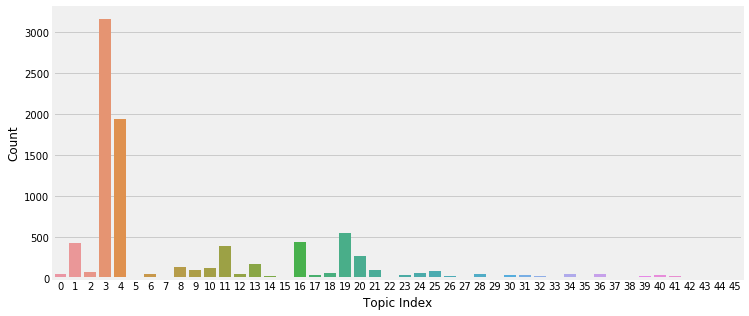

In [4]:
graph.figure(figsize=(11, 5))
sns.countplot(y_train)
graph.xlabel('Topic Index')
graph.ylabel('Count')
graph.show()

n_topics = len(set(y_train))

In [5]:
# Convert the list of indices to a feature set n_words long with a zero or one indicating prescence of the words
def vectorize_data(data, dimension=n_words):
    results = np.zeros((len(data), dimension))
    for i, seq in enumerate(data):
        results[i, seq] = 1
    return results

x_train = vectorize_data(x_train)
x_test = vectorize_data(x_test)

# Convert labels to one hot encoding, note: can do this with keras.ultils.np_utils.to_categorical
def one_hot_label(labels, dimension=n_topics):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = one_hot_label(y_train)
y_test = one_hot_label(y_test)

val_size = 2500
x_val_test, y_val_test, x_val_train, y_val_train = x_train[:val_size], y_train[:val_size], x_train[val_size:], y_train[val_size:] 

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_topics, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_val_train, y_val_train, 
    epochs=9, batch_size=512, 
    validation_data=(x_val_test, y_val_test)
)

Train on 6482 samples, validate on 2500 samples
Epoch 1/9
6482/6482 [==============================] - 4s 622us/step - loss: 2.0781 - acc: 0.5503 - val_loss: 1.3643 - val_acc: 0.7112
Epoch 2/9
6482/6482 [==============================] - 4s 561us/step - loss: 0.9576 - acc: 0.7865 - val_loss: 1.1081 - val_acc: 0.7580
Epoch 3/9
6482/6482 [==============================] - 4s 565us/step - loss: 0.6056 - acc: 0.8703 - val_loss: 1.0579 - val_acc: 0.7720
Epoch 4/9
6482/6482 [==============================] - 4s 569us/step - loss: 0.3834 - acc: 0.9224 - val_loss: 1.0178 - val_acc: 0.7752
Epoch 5/9
6482/6482 [==============================] - 4s 569us/step - loss: 0.2869 - acc: 0.9371 - val_loss: 1.0049 - val_acc: 0.7912
Epoch 6/9
6482/6482 [==============================] - 4s 568us/step - loss: 0.1996 - acc: 0.9543 - val_loss: 1.0410 - val_acc: 0.7772
Epoch 7/9
6482/6482 [==============================] - 4s 568us/step - loss: 0.1677 - acc: 0.9556 - val_loss: 1.0385 - val_acc: 0.7888
Epoch 8

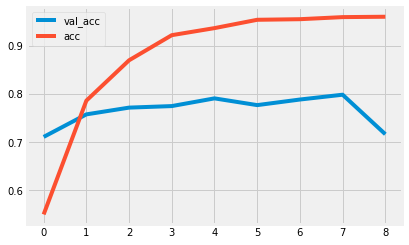

In [7]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

### Train with entire training set

In [8]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_topics, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 5s 507us/step - loss: 1.9026 - acc: 0.5923
Epoch 2/9
8982/8982 [==============================] - 4s 475us/step - loss: 0.8738 - acc: 0.8153
Epoch 3/9
8982/8982 [==============================] - 4s 485us/step - loss: 0.5320 - acc: 0.8892
Epoch 4/9
8982/8982 [==============================] - 4s 466us/step - loss: 0.3524 - acc: 0.9223
Epoch 5/9
8982/8982 [==============================] - 4s 475us/step - loss: 0.2601 - acc: 0.9407
Epoch 6/9
8982/8982 [==============================] - 5s 514us/step - loss: 0.2111 - acc: 0.9463
Epoch 7/9
8982/8982 [==============================] - 5s 512us/step - loss: 0.1821 - acc: 0.9482
Epoch 8/9
8982/8982 [==============================] - 4s 494us/step - loss: 0.1611 - acc: 0.9534
Epoch 9/9
8982/8982 [==============================] - 4s 490us/step - loss: 0.1474 - acc: 0.9520


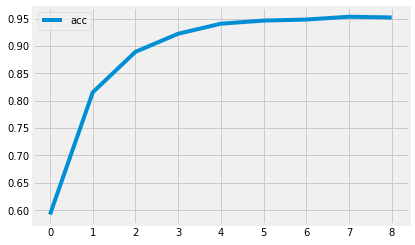

In [9]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

In [10]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 1s 391us/step


[1.0645203457702406, 0.798753339269813]